In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


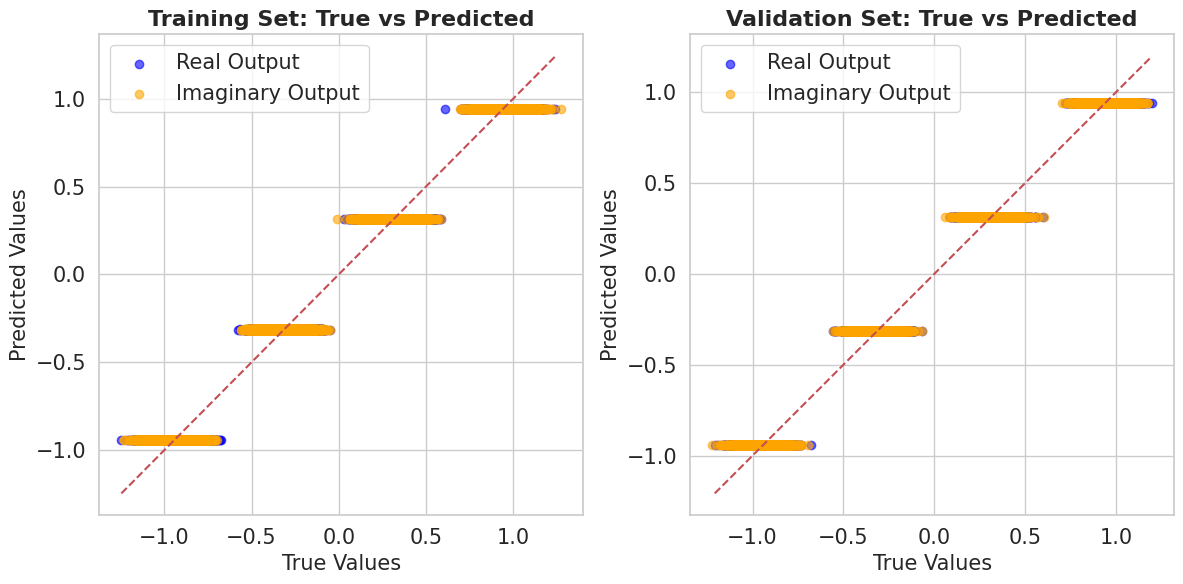

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the CSV data (dataset2.csv)
data = pd.read_csv('/content/drive/MyDrive/OFDM/ofdm_data_with_headers_16QAM.csv')

# Split the data into features (X) and targets (Y)
X = data[['Real_Input', 'Imag_Input']].values
Y = data[['Real_FFT_Output', 'Imag_FFT_Output']].values

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

class FourierAdaline:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size, 2) * 0.01
        self.learning_rate = 0.01
        self.train_loss_history = []
        self.val_loss_history = []

    def predict(self, X):
        return np.dot(X, self.weights)

    def train(self, X_train, Y_train, X_val, Y_val, epochs):
        for _ in range(epochs):
            predictions_train = self.predict(X_train)
            errors_train = Y_train - predictions_train

            train_loss = np.mean(errors_train ** 2)
            self.train_loss_history.append(train_loss)

            self.weights += self.learning_rate * np.dot(X_train.T, errors_train) / len(X_train)

            predictions_val = self.predict(X_val)
            errors_val = Y_val - predictions_val

            val_loss = np.mean(errors_val ** 2)
            self.val_loss_history.append(val_loss)

# Initialize and train the model
model = FourierAdaline(input_size=2)
epochs = 1000
model.train(X_train, Y_train, X_val, Y_val, epochs)

# Make predictions on both training and validation sets
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

# Set the style for the scatter plots
sns.set(style='whitegrid')

# Plotting scatter plots
plt.figure(figsize=(12, 6))

# Scatter plot for training set
plt.subplot(1, 2, 1)
plt.scatter(Y_train[:, 0], train_predictions[:, 0], color='blue', alpha=0.6, label='Real Output')
plt.scatter(Y_train[:, 1], train_predictions[:, 1], color='orange', alpha=0.6, label='Imaginary Output')
plt.plot([Y_train[:, 0].min(), Y_train[:, 0].max()], [Y_train[:, 0].min(), Y_train[:, 0].max()], 'r--')  # Diagonal line
plt.title('Training Set: True vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Scatter plot for validation set
plt.subplot(1, 2, 2)
plt.scatter(Y_val[:, 0], val_predictions[:, 0], color='blue', alpha=0.6, label='Real Output')
plt.scatter(Y_val[:, 1], val_predictions[:, 1], color='orange', alpha=0.6, label='Imaginary Output')
plt.plot([Y_val[:, 0].min(), Y_val[:, 0].max()], [Y_val[:, 0].min(), Y_val[:, 0].max()], 'r--')  # Diagonal line
plt.title('Validation Set: True vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()


Mean Error: 0.0000
Median Error: -0.0001
Standard Deviation of Error: 0.0710


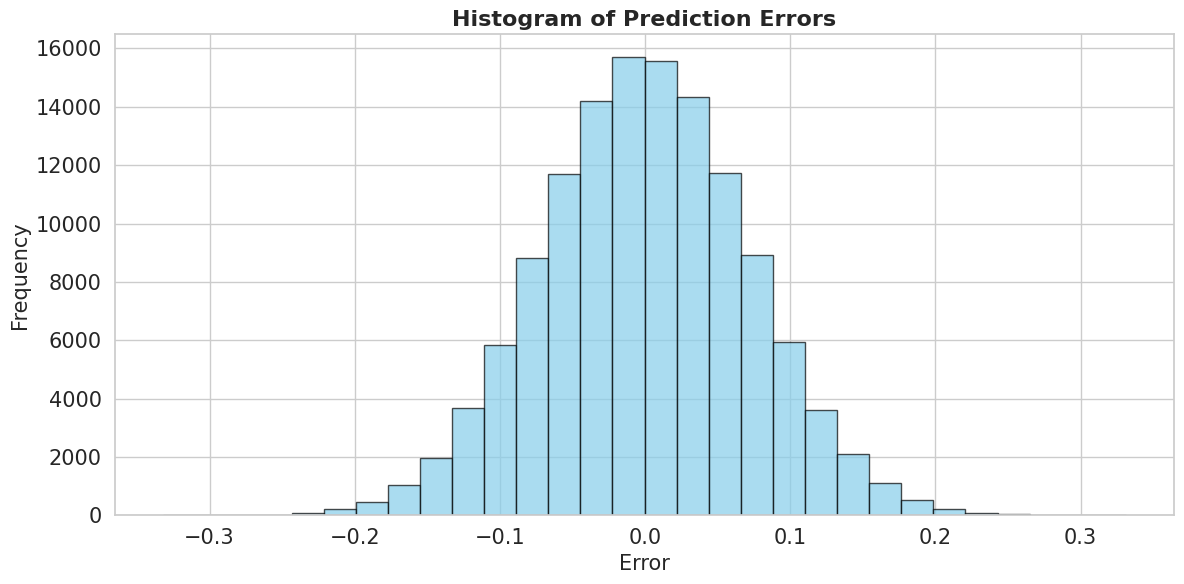

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(X)

errors = Y - predictions  # Calculate errors

# Calculate mean, median, and standard deviation
mean_error = np.mean(errors)
median_error = np.median(errors)
std_dev_error = np.std(errors)

# Print the calculated values
print(f'Mean Error: {mean_error:.4f}')
print(f'Median Error: {median_error:.4f}')
print(f'Standard Deviation of Error: {std_dev_error:.4f}')

# Set the style for the plots
sns.set(style='whitegrid')

# Create a larger figure for the histogram
plt.figure(figsize=(12, 6))

# Plot histogram for the errors
plt.hist(errors.flatten(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels for the histogram
plt.title('Histogram of Prediction Errors', fontsize=16, fontweight='bold')
plt.xlabel('Error', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Adjust ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the histogram
plt.tight_layout()
plt.show()

# Save the histogram plot
plt.savefig('error_histogram.png', dpi=350)


In [ ]:
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Measure training time
start_time = time.time()
model.train(X_train, Y_train, X_val, Y_val, epochs)
training_time = time.time() - start_time
print(f'Training Time: {training_time:.2f} seconds')

# Measure inference time for training predictions
start_time = time.time()
train_predictions = model.predict(X_train)
inference_time_train = time.time() - start_time

# Measure inference time for validation predictions
start_time = time.time()
val_predictions = model.predict(X_val)
inference_time_val = time.time() - start_time

print(f'Inference Time (Training): {inference_time_train:.5f} seconds')
print(f'Inference Time (Validation): {inference_time_val:.5f} seconds')

# Calculate MSE, MAE, and R² for training set
train_mse = mean_squared_error(Y_train, train_predictions)
train_mae = mean_absolute_error(Y_train, train_predictions)
train_r2 = r2_score(Y_train, train_predictions)

print(f'Training Set - MSE: {train_mse:.5f}, MAE: {train_mae:.5f}, R²: {train_r2:.5f}')

# Calculate MSE, MAE, and R² for validation set
val_mse = mean_squared_error(Y_val, val_predictions)
val_mae = mean_absolute_error(Y_val, val_predictions)
val_r2 = r2_score(Y_val, val_predictions)

print(f'Validation Set - MSE: {val_mse:.5f}, MAE: {val_mae:.5f}, R²: {val_r2:.5f}')


Training Time: 2.07 seconds
Inference Time (Training): 0.00073 seconds
Inference Time (Validation): 0.00027 seconds
Training Set - MSE: 0.00501, MAE: 0.05639, R²: 0.99008
Validation Set - MSE: 0.00506, MAE: 0.05675, R²: 0.99007
